In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [2]:
data = pd.read_csv('./2017-05-02/data/listings_visual.csv')
listings_by_host = data['host_id'].value_counts()
top10_listings = listings_by_host.nlargest(n=int(len(listings_by_host)*0.1)).sum()

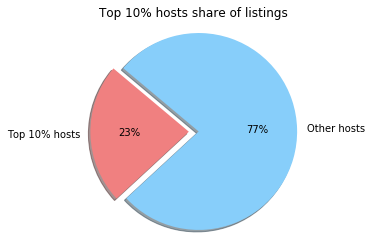

In [3]:
labels = 'Top 10% hosts', 'Other hosts'
sizes = [top10_listings/listings_by_host.sum(), 1-top10_listings/listings_by_host.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Top 10% hosts share of listings')
plt.show()



In [4]:
value_by_host = data.groupby(['host_id']).sum().price
top10_value = value_by_host.nlargest(n=int(len(value_by_host)*0.1)).sum()

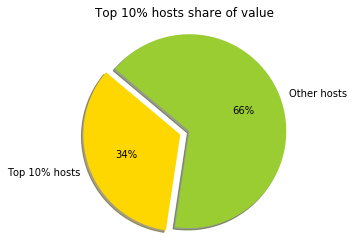

In [5]:
labels = 'Top 10% hosts', 'Other hosts'
sizes = [top10_value/value_by_host.sum(), 1-top10_value/value_by_host.sum()]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Top 10% hosts share of value')
plt.show()

1     30356
2      2743
3       680
4       252
5       109
6        60
7        35
8        26
11       11
10        9
9         8
18        2
20        1
12        1
13        1
14        1
15        1
35        1
16        1
33        1
28        1
Name: host_id, dtype: int64

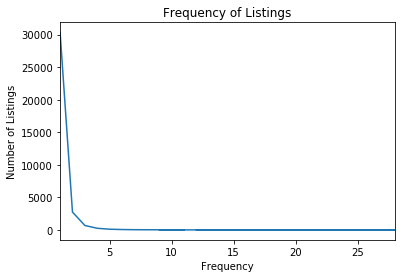

In [6]:
ax = listings_by_host.value_counts().plot()
ax.set(xlabel="Frequency", ylabel="Number of Listings", title='Frequency of Listings')
listings_by_host.value_counts()

0      0.298579
365    0.037690
364    0.019974
89     0.009275
363    0.007975
90     0.006282
1      0.005791
362    0.005766
88     0.005325
122    0.005006
2      0.004834
3      0.004589
336    0.004540
4      0.004515
179    0.004441
358    0.004417
123    0.004196
180    0.003902
8      0.003607
306    0.003558
7      0.003509
87     0.003509
337    0.003484
357    0.003435
5      0.003362
361    0.003264
9      0.003239
348    0.003239
83     0.003190
61     0.003190
         ...   
226    0.000761
196    0.000736
108    0.000736
194    0.000712
182    0.000712
236    0.000712
181    0.000687
195    0.000687
199    0.000687
204    0.000687
238    0.000687
209    0.000687
203    0.000687
114    0.000687
210    0.000687
222    0.000663
205    0.000663
225    0.000663
191    0.000663
198    0.000663
186    0.000638
232    0.000638
212    0.000589
211    0.000589
192    0.000564
188    0.000540
189    0.000540
193    0.000491
190    0.000491
201    0.000466
Name: availability_365, 

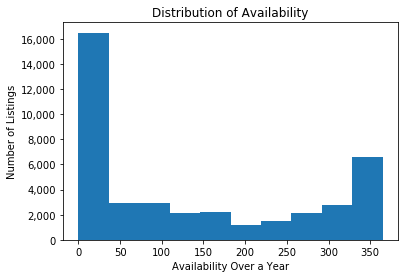

In [7]:
ax = data['availability_365'].plot.hist()
ax.set(xlabel="Availability Over a Year", ylabel="Number of Listings", title='Distribution of Availability')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
print(data['availability_365'].value_counts(normalize=True))

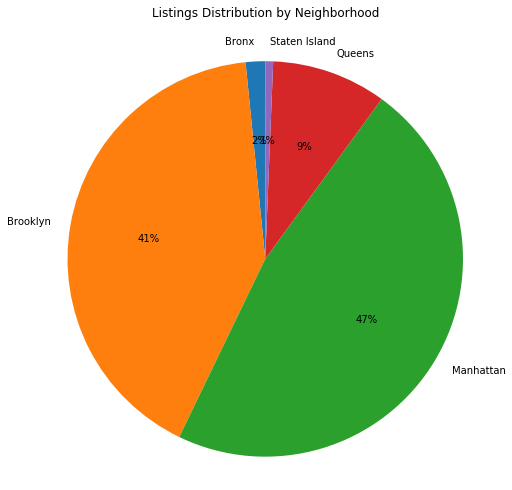

neighbourhood_group
Bronx              649
Brooklyn         16810
Manhattan        19212
Queens            3821
Staten Island      261
Name: id, dtype: int64


In [8]:
labels = 'Bronx', 'Brooklyn','Manhattan','Queens','Staten Island '
explode = (0.1,0,0,0,0)  # explode 1st slice

neighbourhood_dist = data.groupby('neighbourhood_group').id.count()

ax = neighbourhood_dist.plot(kind='pie', autopct='%1.0f%%', startangle=90,figsize=(8,8))
ax.set(ylabel="")
 
plt.axis('equal')
plt.title('Listings Distribution by Neighborhood', x=0.5,y=1.05)
plt.show()
print(neighbourhood_dist)

In [11]:
full_data = pd.read_csv('./2017-05-02/data/listings.csv',low_memory=False)

In [12]:
# parse amenities
full_data.amenities = full_data.amenities.str.replace("[{}]", "")
full_data.amenities = full_data.amenities.str.replace('"', '')
amenities = full_data.amenities.str.get_dummies(sep = ",")


print(amenities)

In [13]:
print(amenities)

       24-hour check-in  Accessible-height bed  Accessible-height toilet  \
0                     0                      0                         0   
1                     0                      0                         0   
2                     0                      0                         0   
3                     0                      0                         0   
4                     0                      0                         0   
5                     1                      0                         0   
6                     1                      0                         0   
7                     0                      0                         0   
8                     0                      0                         0   
9                     0                      0                         0   
10                    0                      0                         0   
11                    0                      0                         0   
12          

In [14]:
top_amenities = amenities.sum().sort_values(ascending=False).head(11)

In [15]:
top_amenities

Wireless Internet           39373
Kitchen                     38117
Heating                     37729
Essentials                  33642
Air conditioning            33368
Smoke detector              32068
Internet                    27049
TV                          25832
Shampoo                     24447
Carbon monoxide detector    24172
Hangers                     23747
dtype: int64

In [16]:
top_amenities = top_amenities.reset_index().replace({'index': {'Wireless Internet':'Internet'}}).groupby('index', sort=False).sum()

In [17]:
top_amenities

,0
index,
Internet,66422
Kitchen,38117
Heating,37729
Essentials,33642
Air conditioning,33368
Smoke detector,32068
TV,25832
Shampoo,24447
Carbon monoxide detector,24172


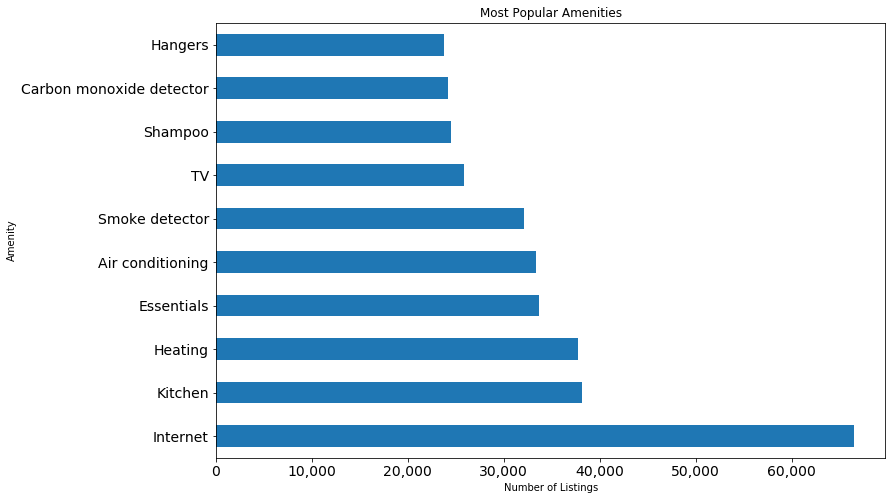

In [22]:
import matplotlib.ticker as mtick
ax = top_amenities.plot(kind='barh', legend=False, title='Most Popular Amenities',figsize=(12,8),fontsize=14)
ax.set(ylabel="Amenity", xlabel="Number of Listings")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
